In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.signal import find_peaks
import pandas as pd
from uncertainties import ufloat
import uncertainties.unumpy as unp
sns.set()
sns.set_theme()
sns.set_palette("magma")

In [2]:

for root, dirs, files in os.walk("Daten/"):
    for filename in files:
        break

In [19]:
pathDict = {
    1:24,
    2:357,
    3:68,
    4:123, 
    5:456,
    6:789,
    7:26,
    8:159,
    9:48,
    10:369,
    11:258,
    12:147
}
inv_pathDict = {pathDict[k]:k for k in pathDict}

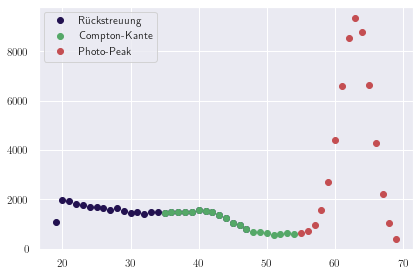

In [54]:
data = np.genfromtxt("Daten/Block 1/Block1_159.Spe", skip_header=12, skip_footer=14)
#plt.plot(peaks,data[peaks],"x")
#plt.plot(np.arange(30,65),data[30:65],"o")

plt.plot(np.arange(19,48),data[19:48],"o",label="Rückstreuung")
plt.plot(np.arange(35,55),data[35:55],"go", label="Compton-Kante")
plt.plot(np.arange(55,70),data[55:70], "ro", label="Photo-Peak")
#lt.plot[]
#plt.xlim(25,95)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Daten/leerlauf.pdf")

# Block 1 Messungen

In [4]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 1/"):
    for filename in files:
        filepath.append(os.path.join(root,filename))
        print(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data, prominence=2000) 
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

        

Block1_123.Spe
Daten/Block 1/Block1_123.Spe
Block1_159.Spe
Daten/Block 1/Block1_159.Spe
Block1_26.Spe
Daten/Block 1/Block1_26.Spe


In [96]:
data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})

,C,Zeit,I
0,9163,300,30.54
1,9359,300,31.20
2,9335,300,31.12


In [61]:
C =  np.array([ufloat(49176,306), ufloat(48599,320), ufloat(48599,320)])
j = np.array([inv_pathDict[k] for k in [123,26,159]])
t = np.array([300 for i in range(3)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["I"] = C/t 

print(df.to_latex(index=False))

\begin{tabular}{rrll}
\toprule
 Projektion &  Zeit &                   C &           I \\
\midrule
          4 &   300 & (4.918+/-0.031)e+04 & 163.9+/-1.0 \\
          7 &   300 & (4.860+/-0.032)e+04 & 162.0+/-1.1 \\
          8 &   300 & (4.860+/-0.032)e+04 & 162.0+/-1.1 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1288/2855026386.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


# BLOCK 2

In [94]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 2/"):
    for filename in files:
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data, prominence=2000) 
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})


,C,Zeit,I
0,7998,300,26.66
1,7621,300,25.40
2,8012,300,26.71
3,7775,300,25.92
4,7965,300,26.55
5,7864,300,26.21
6,7989,300,26.63
7,8115,300,27.05
8,7980,300,26.60


In [66]:
C =  np.array([41777,43230,41772,43714,42274,41326,41886,42662,44080])
C_err = np.array([300,289,287,273,259,297,297,288,280])
uarrC = unp.uarray(C,C_err)
j = np.array([inv_pathDict[k] for k in [123,456,789,26,159,48,147,258,369]])
t = np.array([300 for i in range(C.size)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","C_err","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["C_err"] = C_err
df["I"] = uarrC/t 

print(df.to_latex(index=False))

\begin{tabular}{rrrrl}
\toprule
 Projektion &  Zeit &     C &  C\_err &           I \\
\midrule
          4 &   300 & 41777 &    300 & 139.3+/-1.0 \\
          5 &   300 & 43230 &    289 & 144.1+/-1.0 \\
          6 &   300 & 41772 &    287 & 139.2+/-1.0 \\
          7 &   300 & 43714 &    273 & 145.7+/-0.9 \\
          8 &   300 & 42274 &    259 & 140.9+/-0.9 \\
          9 &   300 & 41326 &    297 & 137.8+/-1.0 \\
         12 &   300 & 41886 &    297 & 139.6+/-1.0 \\
         11 &   300 & 42662 &    288 & 142.2+/-1.0 \\
         10 &   300 & 44080 &    280 & 146.9+/-0.9 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1288/1840750910.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


# Block 3

In [115]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 3/"):
    for filename in files:
        #print(os.path.join(root,filename))
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data,prominence=50)
        peaks = peaks[1] 
        # plt.plot(peaks,data[peaks],"x")
        # plt.plot(data)
        # plt.show()
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})

,C,Zeit,I
0,327,300,1.09
1,361,300,1.20
2,155,300,0.52
3,152,300,0.51
4,362,300,1.21
5,345,300,1.15
6,352,300,1.17
7,328,300,1.09
8,493,300,1.64
9,403,300,1.34


In [ ]:
C =  np.array([1788,1751,2148,1928,2689,679*2, 2145,1829,1904])
C_err = np.array([55,56,58,60,62,36*2,60,60,60])
uarrC = unp.uarray(C,C_err)
j = np.array([inv_pathDict[k] for k in [123,456,789,26,48,159,147,258,369]])
t = np.array([300 for i in range(C.size)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","C_err","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["C_err"] = C_err
df["I"] = uarrC/t 

print(df.to_latex(index=False))

In [67]:
ufloat(150,20)*2

300.0+/-40.0

# Block 4

In [119]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 3/"):
    for filename in files:
        #print(os.path.join(root,filename))
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data,prominence=50)
        peaks = peaks[1] 
        # plt.plot(peaks,data[peaks],"x")
        # plt.plot(data)
        # plt.show()
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
neuData = data.astype({"Zeit":int, "C":int}).round({"I":2})

print(neuData.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    C &  Zeit &     I \\
\midrule
0 &  327 &   300 &  1.09 \\
1 &  361 &   300 &  1.20 \\
2 &  155 &   300 &  0.52 \\
3 &  152 &   300 &  0.51 \\
4 &  362 &   300 &  1.21 \\
5 &  345 &   300 &  1.15 \\
6 &  352 &   300 &  1.17 \\
7 &  328 &   300 &  1.09 \\
8 &  493 &   300 &  1.64 \\
9 &  403 &   300 &  1.34 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_777/1894960086.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(neuData.to_latex())
